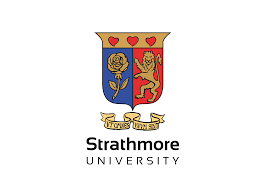

# Project Title

Optimizing agroforestry for climate resilience: A data-driven approach to mitigating environmental shocks and enhancing ecosystem stability

# Objective of the Study
The Objective is to develop machine learning models for optimizing agroforestry systems through species identification, classification, and Carbon sequestration valuation to enhance climate change mitigation and adaptation.

i.	Assess and quantify the potential for carbon sequestration within agroforestry systems using advanced ML techniques, supporting efforts to mitigate climate change.

ii.	To develop machine learning models for species identification and classification within agroforestry systems, enhancing biodiversity management.

iii. To develop a smart decision support system that combines ecological, climate, and species data, providing actionable recommendations in real time to farmers based on climate predictions, soil data, and agroforestry performance metrics.


# Introduction

We will first assess and quantify the potential for carbon sequestration within agroforestry systems using advanced ML techniques, supporting efforts to mitigate climate change. This will be done by calculating the Above Ground Biomass (AGB) using the data collected from the field and existing knowledge on how to calculate the AGB.

We are going to use traditional methods of calculating AGB famously know as Allometric equations and compare them with using various Machine Learning Algorithims. In short we will be comparing the allometric models to machine learning algorithms for aboveground biomass estimation in Agroforestry systems in Kenya

# Relevant Python Libraries

In [1]:
# Required packages
import pandas as pd  # Load and preprocess data.
import os  # Manage file paths and directories.
import requests  # Send HTTP requests to interact with web APIs or download content from the internet.
import io  # Provides tools for working with I/O streams.
import matplotlib.pyplot as plt  # Create static visualizations like line plots, bar charts, and scatter plots.
import seaborn as sns  # Create enhanced statistical data visualizations like heatmaps and pair plots.
import plotly.express as px  # Quickly create interactive visualizations like scatter plots, line charts, and maps.
import plotly.graph_objects as go  # Build detailed and customized interactive visualizations.
import numpy as np  # Perform numerical operations on arrays and matrices efficiently.
import math  # Perform basic mathematical calculations like logarithms and trigonometric functions.
import ee  # Use Google Earth Engine for large-scale geospatial analysis and satellite data processing.
import scipy.stats as stats  # Perform statistical functions and hypothesis testing.
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance.
from sklearn.model_selection import train_test_split  # Split data into training and testing sets for model evaluation.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Use ensemble methods for regression tasks.
from sklearn.neural_network import MLPRegressor  # Use a Multi-Layer Perceptron model for regression.
from sklearn.svm import SVR  # Use a Support Vector Regressor for regression problems.
from sklearn.metrics import mean_squared_error, r2_score  # Evaluate regression models using metrics like MSE and R².
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
import json

# Importing data from my Github



In [2]:
url = 'https://raw.githubusercontent.com/irungus/Dessertation/main/Updated_df.csv'
df = pd.read_csv(url, on_bad_lines='skip')

# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FID              3071 non-null   int64  
 1   agf              3071 non-null   object 
 2   plotID           3071 non-null   int64  
 3   transect         3071 non-null   int64  
 4   County           3071 non-null   object 
 5   genus            3071 non-null   object 
 6   species          3071 non-null   object 
 7   dbh              3071 non-null   int64  
 8   height           3071 non-null   int64  
 9   canopyd          3071 non-null   int64  
 10  latitude         3071 non-null   float64
 11  longitude        3071 non-null   float64
 12  altitude         3071 non-null   float64
 13  accuracy         3071 non-null   float64
 14  B11              3071 non-null   float64
 15  B12              3071 non-null   float64
 16  B2               3071 non-null   float64
 17  B3            

In [5]:
df.columns

Index(['FID', 'agf', 'plotID', 'transect', 'County', 'genus', 'species', 'dbh',
       'height', 'canopyd', 'latitude', 'longitude', 'altitude', 'accuracy',
       'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9',
       'NDVI', 'EVI', 'NDWI', 'RDVI', 'NDVI_red_edge', 'mNDVI_red_edge',
       'MSR_red_edge', 'CI_red_edge', 'MSI', 'LSWI', 'MTCI', 'IRECI', 'PSRI',
       'NDVIA', 'TCARI', 'MCARI', 'TVI', 'SAVI', 'Temp_mean', 'Temp_max',
       'Temp_min', 'Temp_skew', 'Temp_kurtosis', 'Elevation_x', 'Precip_mean',
       'Precip_max', 'Precip_min', 'Precip_skew', 'Precip_kurtosis',
       'Elevation_y', 'Slope', 'Aspect', 'Hill_shade'],
      dtype='object')

In [7]:
df.describe()

,FID,plotID,transect,dbh,height,canopyd,latitude,longitude,altitude,accuracy,...,Elevation_x,Precip_mean,Precip_max,Precip_min,Precip_skew,Precip_kurtosis,Elevation_y,Slope,Aspect,Hill_shade
count,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.00000,3071.000000,...,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000
mean,3267.883751,108.663627,2.512211,45.117226,828.673722,326.596874,-0.870953,36.415453,1481.06899,4.461470,...,1488.649951,0.145360,0.455431,0.032672,1.792521,3.532991,1488.649951,6.005895,174.751429,180.776620
std,2094.865038,49.159574,1.288801,43.117413,639.897316,257.419787,1.179407,1.486559,488.40737,0.845487,...,485.640506,0.067590,0.215144,0.023156,0.528979,2.252783,485.640506,5.533265,99.691172,16.926713
min,0.000000,0.000000,1.000000,5.000000,80.000000,17.000000,-4.537429,34.022104,-67.60000,0.720000,...,6.000000,0.020005,0.094438,0.002507,-0.374094,-1.324472,6.000000,0.000000,0.000000,95.000000
25%,1569.500000,71.000000,1.000000,20.000000,400.000000,130.000000,-1.058631,34.832796,1269.40000,4.460000,...,1283.000000,0.087374,0.313817,0.010561,1.469258,1.885600,1283.000000,2.780288,90.000000,172.000000
50%,3111.000000,115.000000,2.000000,35.000000,680.000000,300.000000,-0.563253,36.939160,1524.80000,4.780000,...,1519.000000,0.148825,0.466118,0.029533,1.940812,3.918816,1519.000000,4.627477,169.694672,180.000000
75%,4699.500000,152.000000,4.000000,55.000000,1100.000000,420.000000,-0.080068,37.467955,1814.00000,4.916000,...,1835.000000,0.182536,0.538720,0.050131,2.140039,4.985466,1835.000000,7.407872,260.538071,189.000000
max,7102.000000,184.000000,4.000000,390.000000,5000.000000,2700.000000,1.215551,39.731914,2482.40000,5.850000,...,2478.000000,0.391672,1.429593,0.109624,2.941834,9.432784,2478.000000,51.096771,352.873383,255.000000
